Código para calcular a raiz de 2 usando o método da bissecção

In [ ]:
def calcular (valor):
    return (valor)**2 - 2

pivoEsq = 1
pivoDir = 2
meioAntigo = 0.5
interacao = 0
while interacao < 10:

    meio = (pivoEsq+pivoDir)/2
    if calcular(meio)*calcular(pivoEsq) > 0:
        pivoEsq = meio
    else:
        pivoDir = meio
    print (meio)
    interacao = interacao + 1

1.5
1.25
1.375
1.4375
1.40625
1.421875
1.4140625
1.41796875
1.416015625
1.4150390625


Cálculo para obter raiz de 2 pelo método de Newton

---



In [ ]:
def calcFun (valor):
    return (valor)**2 - 2
def calcFunLin (valor):
    return 2 * valor
x = 2
while True:
    print (x)
    xnovo = x - (calcFun(x))/(calcFunLin(x))
    if ((xnovo - x) <= 0.0001):
       print (xnovo)
       break

2
1.5


Cálculo do Polinômio do Lagrange

In [ ]:
pontos = [2, 2.5, 4]
n = len(pontos)
x = 3

def f(x):
  return 1/(x**2)

def L(x, i):
  produtorio = 1
  for j in range (0, n):
    if j != i:
      produtorio = produtorio * (x-pontos[j])/(pontos[i]-pontos[j])
  return produtorio

def p(x):
  somatorio = 0
  for i in range (0, n):
    somatorio = somatorio + L(x, i) * f(pontos[i])
  return somatorio

O valor do polinômio em x = 3 é: 0.09874999999999999


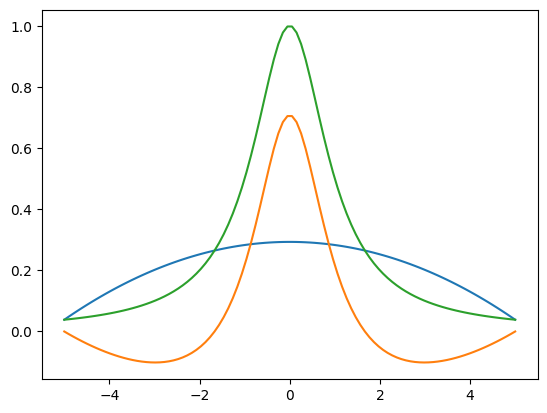

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

plotado = np.array([])

def f(x):
    return 1/(1+x**2)

def L(x, i, pontos):
    produtorio = 1
    for j in range(len(pontos)):
        if j != i:
            produtorio *= (x - pontos[j]) / (pontos[i] - pontos[j])
    return produtorio

def p(x, pontos):
    somatorio = 0
    for i in range(len(pontos)):
        somatorio += L(x, i, pontos) * f(pontos[i])
    return somatorio

def Err(x, pontos):
    return f(x) - p(x, pontos)

pontos = []
n = 3
for a in range(0, n):
   pontos.append(-5 + 10 * a / (n))
erros = []
xIntervalo = np.linspace(-5,5,100)
Valoresp = [p(x, pontos) for x in xIntervalo]
ValoresErr = [Err(x, pontos) for x in xIntervalo]
Valoresf = [f(x) for x in xIntervalo]

plt.plot(xIntervalo, Valoresp, label= "p")
plt.plot(xIntervalo, ValoresErr, label = "Err")
plt.plot(xIntervalo, Valoresf,label='First Li')

plt.show()

Código para aproximar pontos com uma reta

In [ ]:

import numpy as np

# Inicializa as variáveis
min_erro = float('inf')  # Inicializa com um valor muito grande
melhor_c1 = 0
melhor_c2 = 0

# Define a função g(x)
def g(x, c1, c2):
    return (c1 + c2 * x)

# Define a função de erro quadrático
def ErroQuad(c1, c2):
    return ((g(0, c1, c2) - 1)**2 +
            (g(0.25, c1, c2) - 1.25)**2 +
            (g(0.5, c1, c2) - 1.65)**2 +
            (g(0.75, c1, c2) - 2.12)**2 +
            (g(1, c1, c2) - 2.72)**2)

# Varre os valores de c1 e c2
for i in range(0, 1000):
    c1 = i * 0.01
    for j in range(0, 1000):
        c2 = j * 0.01
        erro = ErroQuad(c1, c2)

        # Verifica se este erro é o menor encontrado até agora
        if erro < min_erro:
            min_erro = erro
            melhor_c1 = c1
            melhor_c2 = c2

# Exibe os melhores valores de c1 e c2
print(f"Melhor c1: {melhor_c1}, Melhor c2: {melhor_c2}")

Melhor c1: 0.89, Melhor c2: 1.72


Cálculo de solução discretizada de EDO

In [ ]:

import numpy as np

# Tamanho do sistema (número total de y's que queremos calcular)
n = 10

# Tamanho do passo

h = 0.1

# Função para calcular Termo independente
def calc_d_i(i, h):
    x_i = h * i
    return np.exp(x_i) * (x_i**2 + 1)


# Vetor de termos independentes d_i (pode ser uma lista de valores ou uma função)
d_i = np.array([calc_d_i(i, h) for i in range(n)])
# Inicializando a matriz de coeficientes
A = np.zeros((n, n))

# Preenchendo a matriz de coeficientes com base na relação linear
for i in range(1, n-1):
    A[i, i-1] = ( 1/(h**2) - 1/(2*h))
    A[i, i] = i * h - 2/(h**2)
    A[i, i+1] = (1/(h**2) - 1/(2*h))

# Condições de contorno
A[0, 0] = 1  # y1 = valor conhecido
A[n-1, n-1] = 1  # y10 = valor conhecido

# Vetor de constantes, começando com os termos independentes
d = d_i.copy()

# Ajustar os termos para as condições de contorno
d[0] = 0  # valor conhecido de y1
d[n-1] = np.exp(1)  # valor conhecido de y10

# Resolva o sistema
y = np.linalg.solve(A, d)

print(y)

[-1.47718095e-15  6.44979414e-02  1.47466959e-01  2.59019504e-01
  4.12507157e-01  6.25895708e-01  9.23567532e-01  1.33870900e+00
  1.91648716e+00  2.71828183e+00]


In [ ]:
import numpy as np

# Função para calcular Termo independente (x)
def calc_d_i(i, h):
    return np.exp(h*i) * ((h*i)**2 + 1)

def calcular_y(h):

  # Tamanho do sistema (número total de y's que queremos calcular)
  n = int(1/h + 1)  # Agora temos 11 variáveis, de y1 a y11

  # Vetor de termos independentes d_i (pode ser uma lista de valores ou uma função)
  d_i = np.array([calc_d_i(i, h) for i in range(n)])
  # Inicializando a matriz de coeficientes
  A = np.zeros((n, n))

  # Preenchendo a matriz de coeficientes com base na relação linear
  for i in range(1, n-1):
      A[i, i-1] = ( 1/(h**2) + 1/(2*h))
      A[i, i] = i * h - 2/(h**2)
      A[i, i+1] = (1/(h**2) - 1/(2*h))

  # Condições de contorno
  A[0, 0] = 1  # y1 = valor conhecido
  A[n-1, n-1] = 1  # y11 = valor conhecido

  # Vetor de constantes, começando com os termos independentes
  d = d_i.copy()

  # Ajustar os termos para as condições de contorno
  d[0] = 0  # valor conhecido de y1
  d[n-1] = np.exp(1)  # valor conhecido de y11

  # Resolva o sistema
  return np.linalg.solve(A, d)

print("Solução y para h=0.1:")
y_maior_passo = calcular_y(0.1)
print(y_maior_passo)

print("\nSolução y para h=0.05:")
y_menor_passo = calcular_y(0.05)
print(y_menor_passo)

print("\nSolução y para h=0.025:")
y_menor_ainda_passo = calcular_y(0.025)
print(y_menor_ainda_passo)

interpoladog1_maior = []

for i in range (len(y_maior_passo)):
  j = 2*i
  interpoladog1_maior.append((-y_maior_passo[i] + 2* y_menor_passo[j]))

print("\nSolução y para interpolado g1(h)")
print (interpoladog1_maior)

interpoladog1_menor = []

for i in range (len(y_menor_passo)):
  j = 2*i
  interpoladog1_menor.append((-y_menor_passo[i] + 2* y_menor_ainda_passo[j]))

interpoladog2 = []

for i in range (len(interpoladog1_maior)):
  j = 2*i
  interpoladog2.append((4*interpoladog1_menor[i]-interpoladog1_maior[j])/3)

print("\nSolução y para interpolado g2(h)")
print (interpoladog2)

Solução y para h=0.1:
[5.27831747e-15 1.10400875e-01 2.44056395e-01 4.04638260e-01
 5.96333528e-01 8.23912332e-01 1.09280412e+00 1.40918345e+00
 1.78006654e+00 2.21341978e+00 2.71828183e+00]

Solução y para h=0.05:
[-5.07778101e-15  5.25488477e-02  1.10488077e-01  1.74232328e-01
  2.44224593e-01  3.20938036e-01  4.04877918e-01  4.96583648e-01
  5.96630951e-01  7.05634177e-01  8.24248749e-01  9.53173753e-01
  1.09315470e+00  1.24498643e+00  1.40951624e+00  1.58764714e+00
  1.78034137e+00  1.98862405e+00  2.21358716e+00  2.45639364e+00
  2.71828183e+00]

Solução y para h=0.025:
[-4.65624795e-14  2.56310294e-02  5.25598793e-02  8.08358337e-02
  1.10509841e-01  1.41634564e-01  1.74264438e-01  2.08455724e-01
  2.44266567e-01  2.81757055e-01  3.20989281e-01  3.62027405e-01
  4.04937719e-01  4.49788715e-01  4.96651152e-01  5.45598129e-01
  5.96705157e-01  6.50050232e-01  7.05713918e-01  7.63779421e-01
  8.24332676e-01  8.87462427e-01  9.53260321e-01  1.02182099e+00
  1.09324215e+00  1.1676246

Calcular raiz de função por meio de Newton multidimensional:

In [ ]:

import numpy as np

x0 = np.array([[1], [1]])

def F(x):
    # Retorna um vetor com as duas funções
    return np.array([[2*x[0,0]**3 - x[1,0]**2 - 1],
                     [x[0,0] * (x[1,0]**3) - x[1,0] - 4]])

def J(x):
    # Retorna a matriz Jacobiana corretamente
    return np.array([[6*x[0,0]**2, -2*x[1,0]],
                     [x[1,0]**3, -1 + 3*x[0,0]*(x[1,0]**2)]])

xk = x0
erro = 10
interações = 0
while erro >= 10**(-4):
    interações += 1
    # Resolve o sistema J(xk)v = -F(xk)
    v = np.linalg.solve(J(xk), -F(xk))

    # Atualiza o valor de xk e erro
    xk1 = v + xk
    erro = ((xk1[0,0] - xk[0,0])**2 + (xk1[1,0] - xk[1,0])**2)**(1/2)
    xk = xk1
    print(F(xk))
print(xk)
print(interações)

[[-0.60641399]
 [24.70970429]]
[[-0.07035836]
 [ 6.59356421]]
[[-0.00398385]
 [ 1.27142097]]
[[-0.00020213]
 [ 0.09490891]]
[[-2.44268931e-06]
 [ 6.79902944e-04]]
[[-1.72379000e-10]
 [ 3.57035255e-08]]
[[1.23427449]
 [1.66152647]]
6


In [ ]:
import numpy as np

x0 = np.array([[1], [1]])